In [28]:
#importing all necessary libraries
import nltk
import pandas as pd
import io
import re

In [29]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [30]:
#uploading the given dataset
from google.colab import files
uploaded = files.upload()

Saving assignment_dataset_A.csv to assignment_dataset_A (1).csv


In [31]:
file = open('assignment_dataset_A.csv')

In [32]:
#reading the file 
df = pd.read_csv(io.BytesIO(uploaded['assignment_dataset_A.csv']), encoding= 'cp1252')
print(df)

    Reviewer                                          ReviewTxt
0          1                           Wow... Loved this place.
1          2                                 Crust is not good.
2          3          Not tasty and the texture was just nasty.
3          4  Stopped by during the late May bank holiday of...
4          5  The selection on the menu was great and so wer...
..       ...                                                ...
95        96                          Waitress was good though!
96        97                                Soggy and not good.
97        98                The Jamaican mojitos are delicious.
98        99           Which are small and not worth the price.
99       100                   Paneer Butter Masala is too good

[100 rows x 2 columns]


In [33]:
#Tokenizing to break word or to split a string, text into a list of tokens and then removing stop words
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

In [34]:
#creating a function to remove stopwords from dataframe
def remove_stopword(example):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(example)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  '''filtered_sentence = []
  for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)'''
  return ' '.join(filtered_sentence)

In [35]:
#creating a new coloumn with no stop words
df['Stopword_removed_text'] = df['ReviewTxt'].apply(remove_stopword)

In [36]:
#checking the top 5 rows to see if stop words are removed from review text
df.head()

,Reviewer,ReviewTxt,Stopword_removed_text
0,1,Wow... Loved this place.,Wow ... Loved place .
1,2,Crust is not good.,Crust good .
2,3,Not tasty and the texture was just nasty.,tasty texture nasty .
3,4,Stopped by during the late May bank holiday of...,Stopped late May bank holiday Rick Steve recom...
4,5,The selection on the menu was great and so wer...,selection menu great prices .


In [37]:
#masking the Order Id by creating a function
def mask_order_id(txt):
  x = re.sub("ORD#[0-9]{3}.[0-9]{6}","ORD####-######",txt) # sub is used for substituting the value
  return x
  #making of order Id is done on 'ReviewTxt' col

In [38]:
df['ReviewTxt'] = df['ReviewTxt'].apply(mask_order_id)

In [39]:
df

,Reviewer,ReviewTxt,Stopword_removed_text
0,1,Wow... Loved this place.,Wow ... Loved place .
1,2,Crust is not good.,Crust good .
2,3,Not tasty and the texture was just nasty.,tasty texture nasty .
3,4,Stopped by during the late May bank holiday of...,Stopped late May bank holiday Rick Steve recom...
4,5,The selection on the menu was great and so wer...,selection menu great prices .
...,...,...,...
95,96,Waitress was good though!,Waitress good though !
96,97,Soggy and not good.,Soggy good .
97,98,The Jamaican mojitos are delicious.,Jamaican mojitos delicious .
98,99,Which are small and not worth the price.,small worth price .


In [40]:
#Sentiment analysis has been done by using Text Blob
#Based on polarity, 5 divisions are being made 

from textblob import TextBlob

def sentiment(a):
  sentim = TextBlob(a).sentiment
  if sentim.polarity>0.80:
    return 5
  elif sentim.polarity>0.50 and sentim.polarity<=0.80:
    return 4
  elif sentim.polarity>0 and sentim.polarity<=0.50:
    return 3
  elif sentim.polarity<0 and sentim.polarity>=-0.50:
    return 2
  elif sentim.polarity<-0.50 and sentim.polarity>=0.80:
    return 1
  else:
    return 0

In [41]:
#applying the function and viewing the dataset
df['Sentiment'] = df['ReviewTxt'].apply(sentiment)
df

,Reviewer,ReviewTxt,Stopword_removed_text,Sentiment
0,1,Wow... Loved this place.,Wow ... Loved place .,3
1,2,Crust is not good.,Crust good .,2
2,3,Not tasty and the texture was just nasty.,tasty texture nasty .,0
3,4,Stopped by during the late May bank holiday of...,Stopped late May bank holiday Rick Steve recom...,3
4,5,The selection on the menu was great and so wer...,selection menu great prices .,4
...,...,...,...,...
95,96,Waitress was good though!,Waitress good though !,5
96,97,Soggy and not good.,Soggy good .,2
97,98,The Jamaican mojitos are delicious.,Jamaican mojitos delicious .,5
98,99,Which are small and not worth the price.,small worth price .,2


In [42]:
#finding the overall rating by taking mean 
df.describe()

,Reviewer,Sentiment
count,100.000000,100.000000
mean,50.500000,2.370000
std,29.011492,1.679676
min,1.000000,0.000000
25%,25.750000,0.000000
50%,50.500000,3.000000
75%,75.250000,4.000000
max,100.000000,5.000000


In [43]:
# we can check the of 'Sentiment' by decribe or by calling mean() function

In [44]:
df2=df["Sentiment"].mean()

In [45]:
print(" over all sentiment is :",df2)

 over all sentiment is : 2.37


In [46]:
# Analyzing all the comments and generating a work cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [47]:
##### Generating word cloud only for food that has got higher rating

There are 1133 words in the combination of all review.


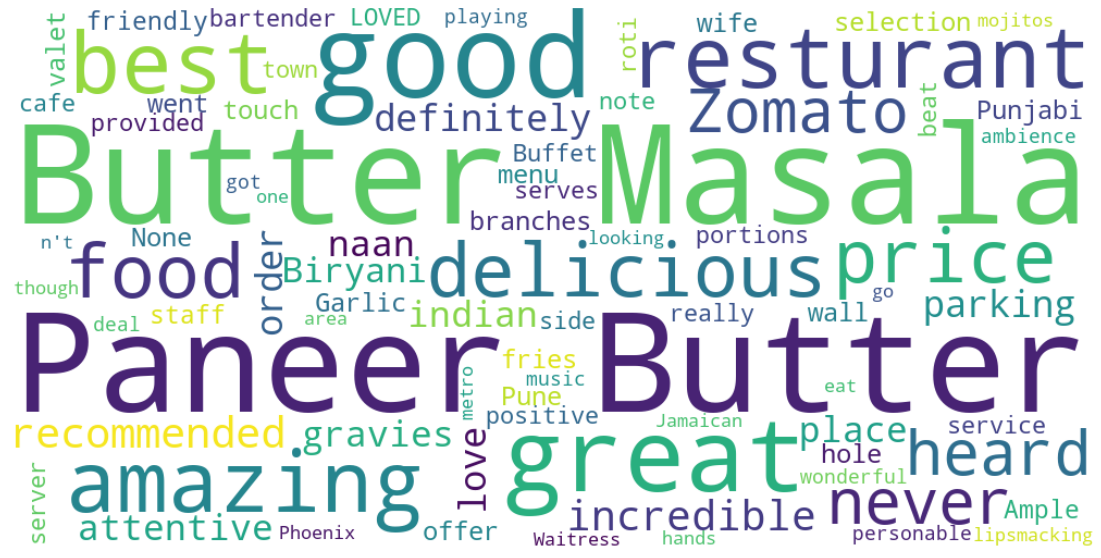

In [48]:
Top_Selling_Df = df[df['Sentiment'] > 3]

 #Creating DataFrame for Review Rating >3 


text = " ".join(review for review in Top_Selling_Df['Stopword_removed_text'])
print ("There are {} words in the combination of all review.".format(len(text)))


# Generate a word cloud image for Best Reviews 
wordcloud = WordCloud(background_color="white", width=1000, height=500).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
############ Generating word cloud only for food that has got Lower rating

There are 1140 words in the combination of all review.


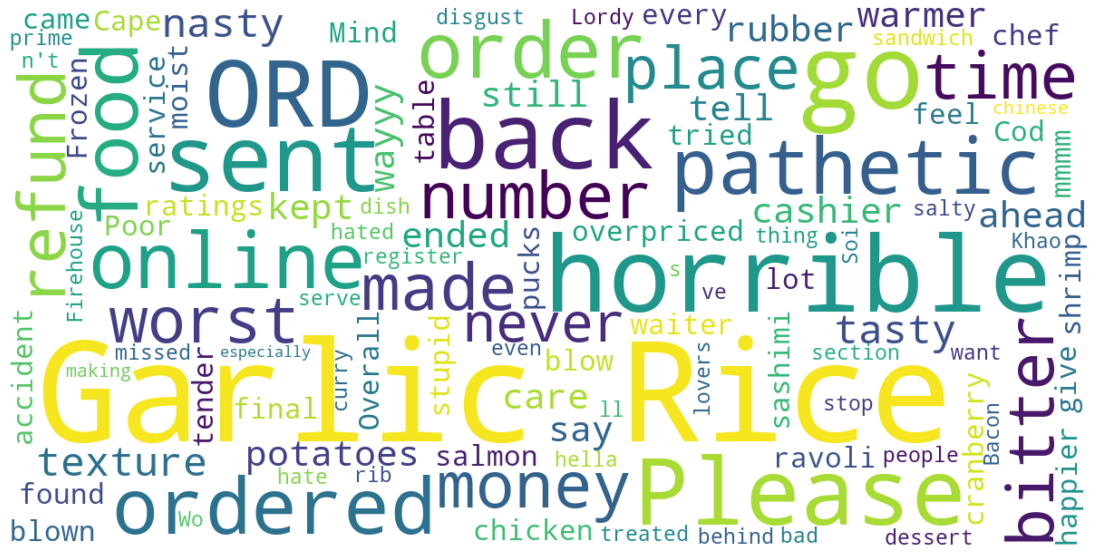

In [50]:
Worst_Selling_Df = df[df['Sentiment'] < 2] 
#Creating DataFrame for Review Rating <2 


text = " ".join(review for review in Worst_Selling_Df['Stopword_removed_text'])
print ("There are {} words in the combination of all review.".format(len(text)))



# Generate a word cloud image for worst Reviews 
wordcloud = WordCloud(background_color="white", width=1200, height=600).generate(text)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
# from the word clouds best and worst food can be interpereted
print( " Best food is PANEER BUTTER MASALA")
print(" Worst Food id GARLIC RICE")

 Best food is PANEER BUTTER MASALA
 Worst Food id GARLIC RICE
